# To Perform EDA(Exploratory Data Analysis) on the provided dataset of Super Samplestore.
## EDA provides a stage for breaking down problem statements into smaller experiments which can help understand the dataset.

In [40]:
# Data Exploration 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [41]:
df = pd.read_csv('downloads/SampleSuperstore.csv')

In [42]:
df.head()  #to know first 5 rows and columns

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Cleaning
## Step 1: Variable Identification

Dependent variable : Profit

Independent Variables : 
    1. Ship mode
    2. Segment
    3. Country
    4. City
    5. State
    6. Postal code
    7. Region
    8. Category
    9. Sub-Category
    10. Sales
    11. Quantity
    12. Discount

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Data Types:
    string:
        1. Ship mode
        2. segment
        3. country
        4. city
        5. state
        6. region
        7. category
        8. sub-category
    Numeric:
        1. Postal code
        2. Sales
        3. Quantity
        4. Discount
        5. Profit

In [44]:
df.describe() #to know about statistical analysis of all numerical data

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Step 2 : Univariate Analysis
#Analyzing one variable at a time.

### Visualization of Categorical Variable is shown through Barplot.

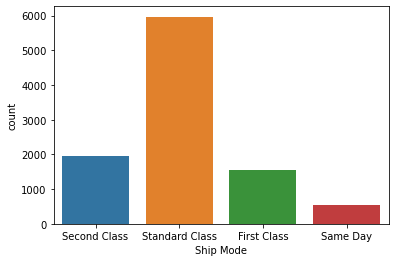

In [45]:
sns.countplot(x = 'Ship Mode', data =df)

### As we can see the barplot above, we observe that our data contains Standard class as majority.

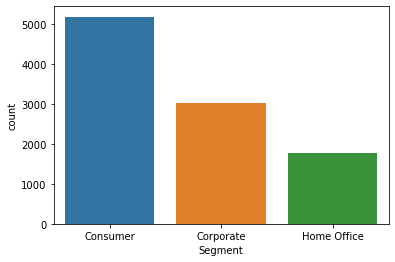

In [46]:
sns.countplot(x = 'Segment', data = df)

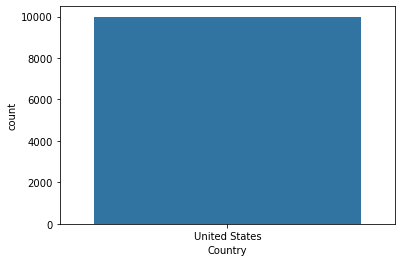

In [47]:
sns.countplot(x = 'Country', data = df)

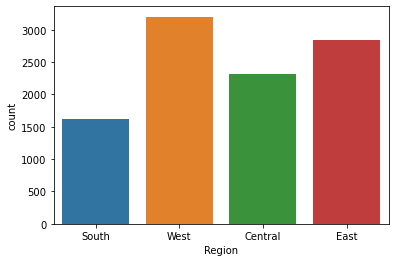

In [48]:
sns.countplot(x = 'Region', data = df)

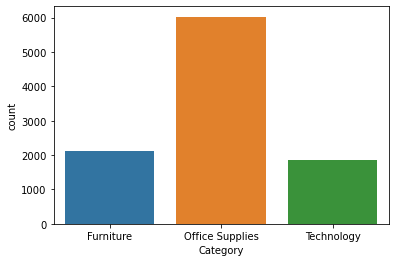

In [49]:
sns.countplot(x = 'Category', data = df)

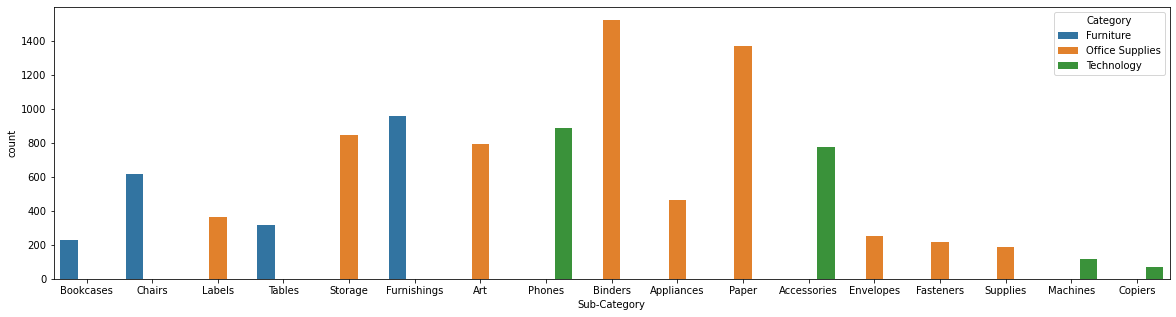

In [50]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'Sub-Category', data = df, hue = 'Category')

## We can view graphical output through box plot and histogram for continuous variable.

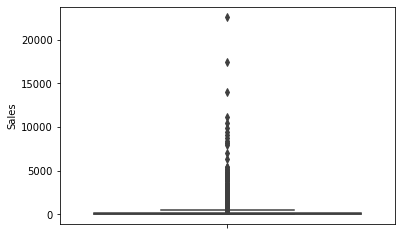

In [51]:
sns.boxplot(y = 'Sales', data = df)

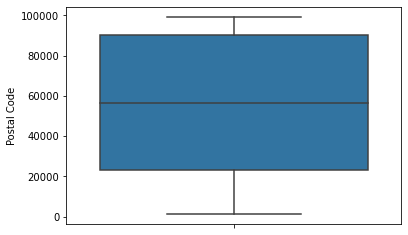

In [52]:
sns.boxplot(y = 'Postal Code', data = df)

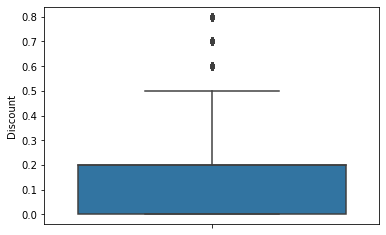

In [53]:
sns.boxplot(y = 'Discount', data = df)

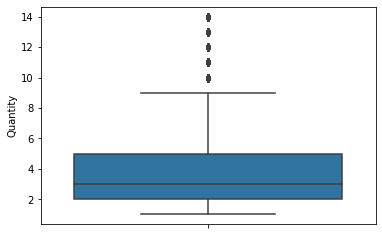

In [54]:
sns.boxplot(y = 'Quantity', data = df)

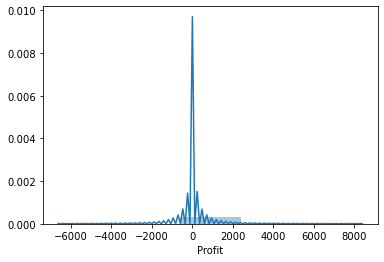

In [55]:
sns.distplot(df['Profit'], bins =5)

### Step 3 : Bivariate Analysis

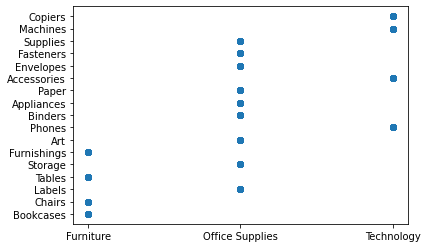

In [56]:
plt.scatter(df['Category'], df['Sub-Category'])

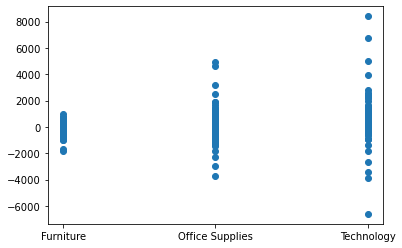

In [57]:
plt.scatter(df['Category'], df['Profit'])

Text(0.5, 1.0, 'Highest sales in Superstore based on sub-category')

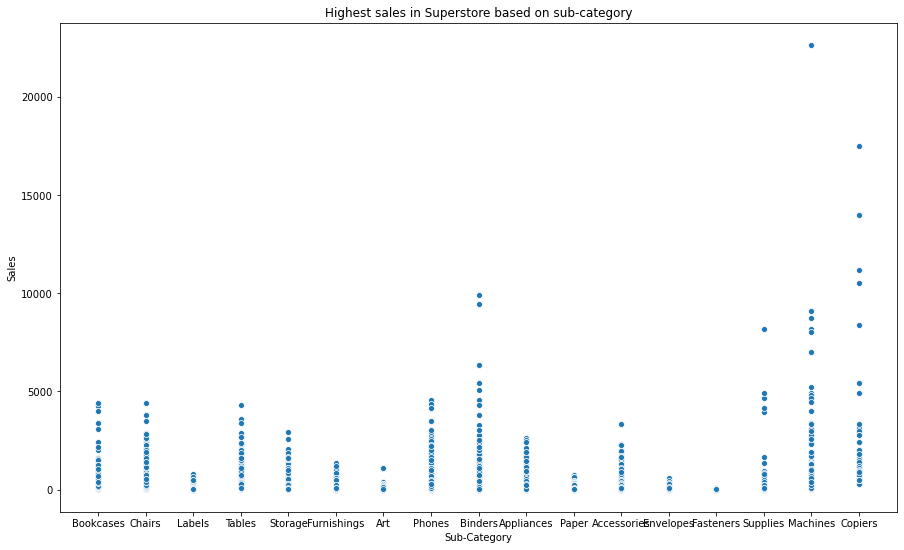

In [58]:
plt.figure(figsize=(15,9))
sns.scatterplot(df['Sub-Category'],df['Sales'])
plt.title('Highest sales in Superstore based on sub-category')

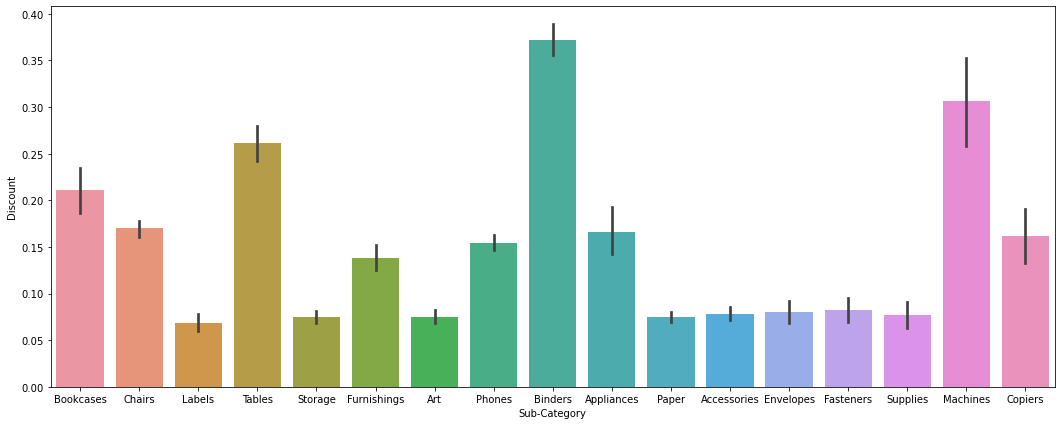

In [59]:
plt.figure(figsize=(18,7))
sns.barplot(x='Sub-Category',y='Discount',data=df)

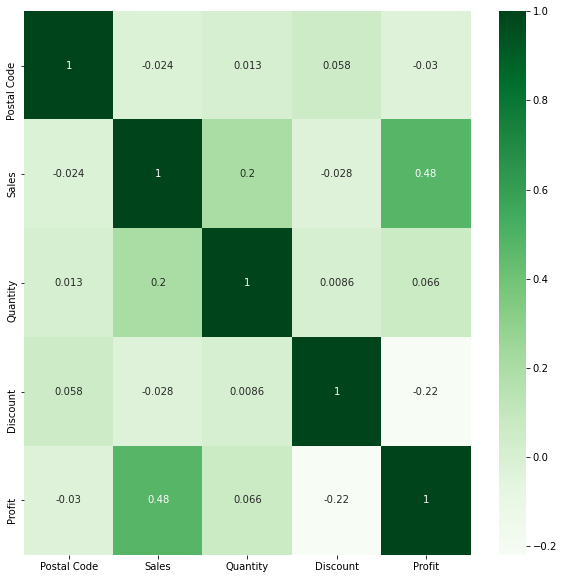

In [60]:

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap = "Greens")

In [61]:
counts = df.groupby(['Segment','Category'], axis = 0)
counts.size()

Segment      Category       
Consumer     Furniture          1113
             Office Supplies    3127
             Technology          951
Corporate    Furniture           646
             Office Supplies    1820
             Technology          554
Home Office  Furniture           362
             Office Supplies    1079
             Technology          342
dtype: int64

In [62]:
counts = df.groupby(['Category','Sub-Category'], axis = 0)
counts.size()

Category         Sub-Category
Furniture        Bookcases        228
                 Chairs           617
                 Furnishings      957
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        217
                 Labels           364
                 Paper           1370
                 Storage          846
                 Supplies         190
Technology       Accessories      775
                 Copiers           68
                 Machines         115
                 Phones           889
dtype: int64

In [63]:
counts = df.groupby(['Ship Mode','City'], axis = 0)
counts.size()

Ship Mode       City      
First Class     Abilene       1
                Akron         3
                Allen         2
                Altoona       2
                Anaheim       6
                             ..
Standard Class  Woonsocket    1
                Yonkers       9
                York          5
                Yucaipa       1
                Yuma          1
Length: 1076, dtype: int64

## Step 4 : Missing Value Treatment

In [64]:
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
df.isnull().values.any() #incase if there is even 1 single null value, it will say true else false.

False

In [66]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Step 5 : Outliers

In [67]:
df['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

In [68]:
IQR =df['Discount'].quantile(0.75)-df['Discount'].quantile(0.25)
print(IQR)

0.2


In [69]:
Upper_OutlierLimit = df['Discount'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit = df['Discount'].quantile(0.25) - 1.5*IQR
print(Upper_OutlierLimit)
print(Lower_OutlierLimit)

0.5
-0.30000000000000004


In [70]:
OutlierValues = df[(df['Discount']>=Upper_OutlierLimit)| (df['Discount']<=Lower_OutlierLimit)]
OutlierValues

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
28,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,9.618,2,0.7,-7.0532
32,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,6.858,6,0.7,-5.7150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9870,First Class,Corporate,United States,Mason,Ohio,45040,East,Office Supplies,Binders,22.428,3,0.7,-17.9424
9877,First Class,Home Office,United States,Cleveland,Ohio,44105,East,Office Supplies,Binders,8.700,5,0.7,-6.3800
9903,Standard Class,Consumer,United States,Carrollton,Texas,75007,Central,Furniture,Furnishings,25.128,3,0.6,-6.9102
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.386,7,0.8,-35.8176


In [71]:
A = df[(df['Discount']>=Upper_OutlierLimit)]['Discount'].index
A

Int64Index([  14,   15,   27,   28,   32,   36,   75,   76,   78,   95,
            ...
            9831, 9834, 9835, 9844, 9869, 9870, 9877, 9903, 9920, 9921],
           dtype='int64', length=922)

In [72]:
df['Discount'][A] = df['Discount'].quantile(0.85)

<ipython-input-72-f812f276f6e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discount'][A] = df['Discount'].quantile(0.85)


In [73]:
B = df[(df['Discount']<=Lower_OutlierLimit)]['Discount'].index
B

Int64Index([], dtype='int64')

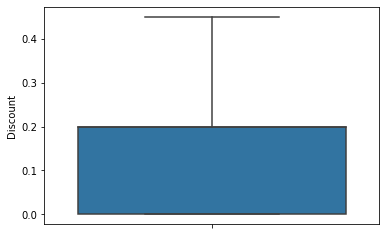

In [74]:
sns.boxplot(y = 'Discount',data = df)

### By InterQuantile Range we can remove outliers. It is good to remove outliers as after removing it changes the results of data analysis and statistical model.

Thankyou!